In [2]:
import torch
import torch.optim as optim
import torch.nn as nn
import numpy as np

In [3]:
torch.manual_seed(42)
model = nn.Sequential(nn.Linear(2, 1))
optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss(reduction='mean')
 
print(*model.parameters())

Parameter containing:
tensor([[0.5406, 0.5869]], requires_grad=True) Parameter containing:
tensor([-0.1657], requires_grad=True)


In [4]:
X = [(0,0),(0,1),(1,0),(1,1)]
Y = [0,1,1,1]
x = torch.tensor(X).view(4,2).float()
y_hat = model(x)
print(y_hat)

tensor([[-0.1657],
        [ 0.4212],
        [ 0.3750],
        [ 0.9619]], grad_fn=<AddmmBackward>)


In [5]:
class Perceptron:
    def __init__(self,param):
        self.w1, self.w2, self.b = param
    
    def calc(self, x1, x2):
        z = self.w1 * x1 + self.w2 * x2 + self.b
        if z >= 0: return 1
        else: return 0

In [6]:
p = nn.Linear(1,1)
p.weight.data = torch.tensor([3.0])
p.bias.data = torch.tensor([2.0])
list(p.parameters())
x = torch.tensor([2,3,4]).view(3,1,1).float()
p(x)

tensor([[ 8.],
        [11.],
        [14.]], grad_fn=<AddBackward0>)

In [7]:
p = nn.Linear(2,1)
p.weight.data = torch.tensor([[3.0, 1.0]])
p.bias.data = torch.tensor([2.0])
print(list(p.parameters()))
#x = torch.tensor([[[2.0, 3.0]]])
x = torch.tensor([[2,3],[3,3]]).view(2,1,2).float()
x = torch.tensor([2,3,3,3]).view(2,1,2).float()
p(x) 

[Parameter containing:
tensor([[3., 1.]], requires_grad=True), Parameter containing:
tensor([2.], requires_grad=True)]


tensor([[[11.]],

        [[14.]]], grad_fn=<AddBackward0>)

In [8]:
3*2 +1*3 +2

11

In [9]:
p = nn.Linear(2,1)
p.weight.data = torch.tensor([3.0, 1.0])
p.bias.data = torch.tensor([2.0])
print(list(p.parameters()))
x = torch.tensor([[0,0],[0,1],[1,0],[1,1]]).view(4,1,2).float()
p(x) 

[Parameter containing:
tensor([3., 1.], requires_grad=True), Parameter containing:
tensor([2.], requires_grad=True)]


tensor([[2.],
        [3.],
        [5.],
        [6.]], grad_fn=<AddBackward0>)

In [16]:
torch.manual_seed(42)
p = nn.Linear(2,1)
p.weight.data = torch.tensor([-1.0, 1.0])
p.bias.data = torch.tensor([-1.5])
model = torch.nn.Sequential(
    p,
    torch.nn.Sigmoid()
)
#x = torch.tensor([[0,0],[0,1],[1,0],[1,1]]).view(4,1,2).float()
x = torch.tensor([0,0,0,1,1,0,1,1]).view(4,1,2).float()
y = torch.tensor([0,1,1,1]).view(4,1)
print(model(x))

optimizer = optim.SGD(model.parameters(), lr=0.1)
#loss_fn = nn.MSELoss(reduction='mean')
loss_fn = nn.CrossEntropyLoss()
#loss_fn = nn.BCELoss()

for epoch in range(1000):
    model.train()
    yhat = model(x)
    
    loss = loss_fn(yhat,y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()


print(model(x))
 

tensor([[0.1824],
        [0.3775],
        [0.0759],
        [0.1824]], grad_fn=<SigmoidBackward>)


RuntimeError: multi-target not supported at C:\w\1\s\tmp_conda_3.7_104508\conda\conda-bld\pytorch_1572950778684\work\aten\src\THNN/generic/ClassNLLCriterion.c:22

In [81]:
print(*net.parameters())

Parameter containing:
tensor([3., 1.], requires_grad=True) Parameter containing:
tensor([2.], requires_grad=True)


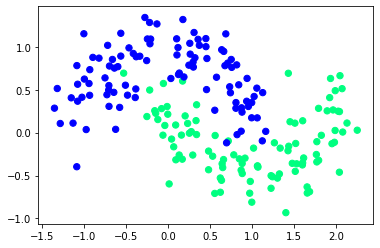

C:\Users\khthe\.conda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


0.97


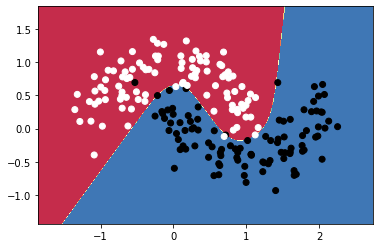

In [132]:
X = torch.from_numpy(X).type(torch.FloatTensor)
y = torch.from_numpy(y).type(torch.LongTensor)


import torch.nn as nn
import torch.nn.functional as F

#our class must extend nn.Module
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        #Our network consists of 3 layers. 1 input, 1 hidden and 1 output layer
        #This applies Linear transformation to input data. 
        self.fc1 = nn.Linear(2,3)
        
        #This applies linear transformation to produce output data
        self.fc2 = nn.Linear(3,2)
        
    #This must be implemented
    def forward(self,x):
        #Output of the first layer
        x = self.fc1(x)
        #Activation function is Relu. Feel free to experiment with this
        x = F.tanh(x)
        #This produces output
        x = self.fc2(x)
        return x
        
    #This function takes an input and predicts the class, (0 or 1)        
    def predict(self,x):
        #Apply softmax to output
        pred = F.softmax(self.forward(x))
        ans = []
        for t in pred:
            if t[0]>t[1]:
                ans.append(0)
            else:
                ans.append(1)
        return torch.tensor(ans)
        

#Initialize the model        
model = Net()
#Define loss criterion
criterion = nn.CrossEntropyLoss()
#Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

#Number of epochs
epochs = 50000
#List to store losses
losses = []
for i in range(epochs):
    #Precit the output for Given input
    y_pred = model.forward(X)
    #Compute Cross entropy loss
    loss = criterion(y_pred,y)
    #Add loss to the list
    losses.append(loss.item())
    #Clear the previous gradients
    optimizer.zero_grad()
    #Compute gradients
    loss.backward()
    #Adjust weights
    optimizer.step()
    

from sklearn.metrics import accuracy_score
print(accuracy_score(model.predict(X),y))
    

def predict(x):
    x = torch.from_numpy(x).type(torch.FloatTensor)
    ans = model.predict(x)
    return ans.numpy()



    
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func,X,y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx,yy=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.binary)
    
    
plot_decision_boundary(lambda x : predict(x) ,X.numpy(), y.numpy())

In [114]:
X

array([[ 0.76124789,  0.72137115],
       [ 1.65197081, -0.2536864 ],
       [ 0.54546113,  0.77019213],
       [ 0.51151333,  0.30364052],
       [ 0.93157455,  0.46206014],
       [ 1.21755278,  0.51404305],
       [ 1.59100575, -0.1050253 ],
       [ 2.15962228,  0.35184843],
       [-0.90498855,  0.26769582],
       [-0.29360948,  0.75043196],
       [ 1.12355978,  0.06877339],
       [ 0.14757676,  0.30608126],
       [ 0.29148379,  0.95235206],
       [ 0.52079969, -0.17997308],
       [ 0.35603908,  0.84615975],
       [ 0.89772072, -0.57431249],
       [-0.15591392, -0.16167268],
       [ 0.61903578, -0.4324993 ],
       [ 0.13169054,  1.18036156],
       [-0.29050562,  0.77717293],
       [ 1.88507759, -0.0938116 ],
       [ 0.59275231,  0.72110187],
       [-0.54826554,  0.64427598],
       [ 0.85662417, -0.63285497],
       [-0.1669528 ,  0.8531625 ],
       [ 0.27673393,  0.70730111],
       [ 1.85225992, -0.08582066],
       [-0.02001061,  1.20082273],
       [ 0.53662209,